In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Lambda, Dense, Flatten,Dropout
from keras.models import Model
from keras.optimizers import Adam

In [2]:

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Using TensorFlow backend.


In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
data= !unzip data\ \(2\).zip

In [13]:
batch_size=30

In [14]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/Traning_data',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical',
        color_mode="rgb")  # since we use categorical_crossentropy loss, we need binary labels



Found 61200 images belonging to 36 classes.


In [15]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/Test_data',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode="rgb")

Found 11100 images belonging to 36 classes.


In [ ]:
#dont run

'''# Create base model
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False)
# Freeze base model
base_model.trainable = False

# Create new model on top.
inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam()

# Iterate over the batches of a dataset.
for inputs, targets in new_dataset:
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        # Forward pass.
        predictions = model(inputs)
        # Compute the loss value for this batch.
        loss_value = loss_fn(targets, predictions)

    # Get gradients of loss wrt the *trainable* weights.
    gradients = tape.gradient(loss_value, model.trainable_weights)
    # Update the weights of the model.
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))'''

"# Create base model\nbase_model = keras.applications.Xception(\n    weights='imagenet',\n    input_shape=(150, 150, 3),\n    include_top=False)\n# Freeze base model\nbase_model.trainable = False\n\n# Create new model on top.\ninputs = keras.Input(shape=(150, 150, 3))\nx = base_model(inputs, training=False)\nx = keras.layers.GlobalAveragePooling2D()(x)\noutputs = keras.layers.Dense(1)(x)\nmodel = keras.Model(inputs, outputs)\n\nloss_fn = keras.losses.BinaryCrossentropy(from_logits=True)\noptimizer = keras.optimizers.Adam()\n\n# Iterate over the batches of a dataset.\nfor inputs, targets in new_dataset:\n    # Open a GradientTape.\n    with tf.GradientTape() as tape:\n        # Forward pass.\n        predictions = model(inputs)\n        # Compute the loss value for this batch.\n        loss_value = loss_fn(targets, predictions)\n\n    # Get gradients of loss wrt the *trainable* weights.\n    gradients = tape.gradient(loss_value, model.trainable_weights)\n    # Update the weights of the 

In [6]:
IMAGE_SIZE=[150,150]

In [18]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [16]:
#Transfer learning with fine tuning
# don't train existing weights
'''for layer in vgg.layers:
    if layer.name == 'block5_conv1':
      break
    layer.trainable=False
    print('layer'+layer.name + 'frozen')

    
x=vgg.layers[-1].output    
x = Flatten()(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(36, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction) 

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()'''

layerinput_1frozen
layerblock1_conv1frozen
layerblock1_conv2frozen
layerblock1_poolfrozen
layerblock2_conv1frozen
layerblock2_conv2frozen
layerblock2_poolfrozen
layerblock3_conv1frozen
layerblock3_conv2frozen
layerblock3_conv3frozen
layerblock3_poolfrozen
layerblock4_conv1frozen
layerblock4_conv2frozen
layerblock4_conv3frozen
layerblock4_poolfrozen
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
______________________________________

In [19]:
#Transfer learning
for layer in vgg.layers:
    layer.trainable = False
    
    
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(36, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)    

In [20]:
# view the structure of the model
model.summary()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
steps_per_epoch=2000
validation_steps=800
epochs=90

#training the model
model.fit_generator(
        train_generator,
        steps_per_epoch=steps_per_epoch // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps // batch_size)

Epoch 1/90
66/66 [==============================] - 11s 174ms/step - loss: 3.4882 - accuracy: 0.1162 - val_loss: 2.9263 - val_accuracy: 0.2090
Epoch 2/90
66/66 [==============================] - 11s 159ms/step - loss: 2.6658 - accuracy: 0.2429 - val_loss: 1.9436 - val_accuracy: 0.4500
Epoch 3/90
66/66 [==============================] - 10s 159ms/step - loss: 2.2737 - accuracy: 0.3510 - val_loss: 1.9086 - val_accuracy: 0.4564
Epoch 4/90
66/66 [==============================] - 10s 158ms/step - loss: 2.0452 - accuracy: 0.3970 - val_loss: 1.5904 - val_accuracy: 0.5564
Epoch 5/90
66/66 [==============================] - 11s 161ms/step - loss: 1.8954 - accuracy: 0.4510 - val_loss: 1.2037 - val_accuracy: 0.5821
Epoch 6/90
66/66 [==============================] - 11s 159ms/step - loss: 1.7650 - accuracy: 0.4551 - val_loss: 1.3572 - val_accuracy: 0.5628
Epoch 7/90
66/66 [==============================] - 11s 160ms/step - loss: 1.7852 - accuracy: 0.4692 - val_loss: 1.5048 - val_accuracy: 0.6628

In [23]:
#to save model for future use
model.save('katogha.h5')

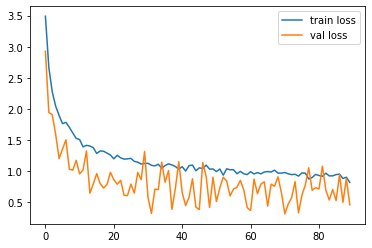

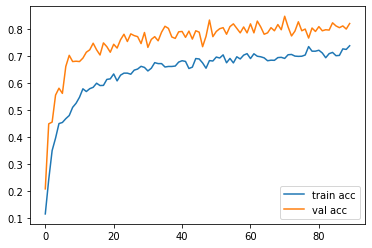

<Figure size 432x288 with 0 Axes>

In [24]:
# loss
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [52]:
#letter in Nepali devanagari

In [51]:
a=np.array(['yna','taamatar','thaa','daa','dhaa','adna','tabala','tha','da','dha','ka','na','pa','pha','ba','bha','ma','yaw','ra','la','waw','motosaw','petchiryakha','patalosaw','ha','chhya','tra','gya','ga','gha','kna','cha','chha','ja','jha'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'ga'

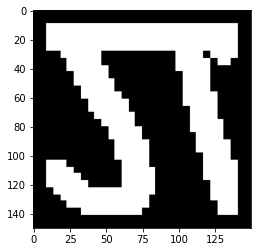

In [50]:
path="data/Test_data/character_3_ga/13316.png"  #enter  path of predecting image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
test=load_img(path,grayscale=False,target_size=(150,150))
test1 = img_to_array(test)
test1.shape
import matplotlib.pyplot as plt

plt.imshow(test1.reshape(150,150,3))
test1=test1/255


y=model.predict(test1.reshape(1,150,150,3))
p=np.argmax(y)-1

a[p]

35